<a href="https://colab.research.google.com/github/Asakeblessing/Quantum-Analysis-Project/blob/main/Bank_marketing_Sub_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display first few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Check for missing or null values
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
# Count 'unknown' in each column
for col in df.columns:
    if df[col].dtype == 'object':
        unknown_count = (df[col] == 'unknown').sum()
        if unknown_count > 0:
            print(f"{col}: {unknown_count} unknowns")

# Optional: Replace 'unknown' with NaN
df.replace('unknown', pd.NA, inplace=True)


job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns


In [ ]:
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])


In [ ]:
# Map target to binary (yes = 1, no = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
# Check again if any 'unknown' values remain
for col in df.columns:
    if df[col].dtype == 'object':
        unknown_count = (df[col] == 'unknown').sum()
        if unknown_count > 0:
            print(f"{col}: {unknown_count} unknowns")


In [ ]:
# Check for any NaN values (if you used pd.NA earlier)
print(df.isnull().sum())


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [ ]:
# Confirm what values are being counted as missing
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    print(f"{col} value counts:")
    print(df[col].value_counts(dropna=False), "\n")


job value counts:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
<NA>               330
Name: count, dtype: int64 

marital value counts:
marital
married     24928
single      11568
divorced     4612
<NA>           80
Name: count, dtype: int64 

education value counts:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
<NA>                    1731
illiterate                18
Name: count, dtype: int64 

default value counts:
default
no      32588
<NA>     8597
yes         3
Name: count, dtype: int64 

housing value counts:
housing
yes     21576
no      18622
<NA>      990
Name: count, dtype: int64 

loan value counts:
loan
no      33950
yes      624

In [ ]:
# Replace 'unknown' with clearer labels
df['job'] = df['job'].replace('unknown', 'Other')
df['marital'] = df['marital'].replace('unknown', 'Unknown')
df['education'] = df['education'].replace('unknown', 'Unknown')
df['default'] = df['default'].replace('unknown', 'No Info')
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])


In [ ]:
# Check again for unknowns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {(df[col] == 'unknown').sum()} unknowns")


job: 0 unknowns
marital: 0 unknowns
education: 0 unknowns
default: 0 unknowns
housing: 0 unknowns
loan: 0 unknowns
contact: 0 unknowns
month: 0 unknowns
day_of_week: 0 unknowns
poutcome: 0 unknowns


In [ ]:
# Check for NaN/nulls
df.isnull().sum()


,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
df['job'] = df['job'].fillna('Other')
df['marital'] = df['marital'].fillna('Unknown')
df['education'] = df['education'].fillna('Unknown')
df['default'] = df['default'].fillna('No Info')
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])
df['loan'] = df['loan'].fillna(df['loan'].mode()[0])


In [ ]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.to_csv("Cleaned_BankMarketing.csv", index=False)


In [ ]:
from google.colab import files
files.download("Cleaned_BankMarketing.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EDA ( Exploratory Data Analysis ) Approach to study Patterns
and Trends

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Cleaned_BankMarketing.csv', sep=',')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
Data info

In [ ]:
print(df.info())
print(df.describe())
print(df['y'].value_counts())

#outcome out of 36,548 customers (≈89%) only 4,640 customers (≈11%) subscribe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Age Distribution Among Subscribers

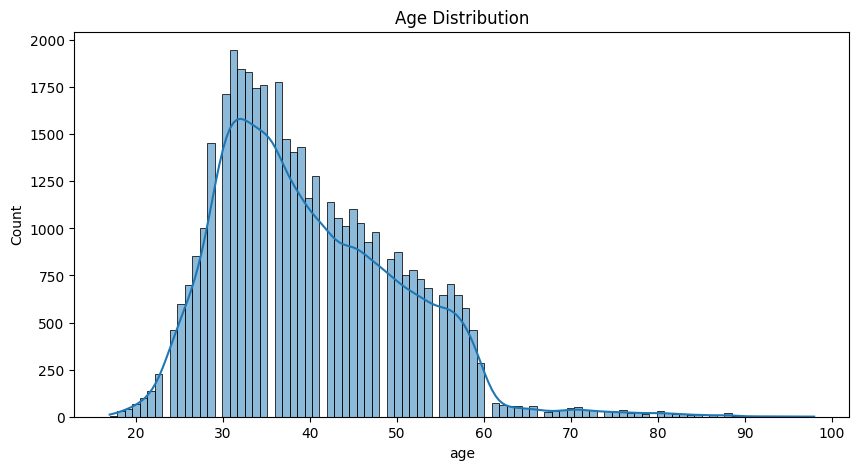

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()


Job Distribution

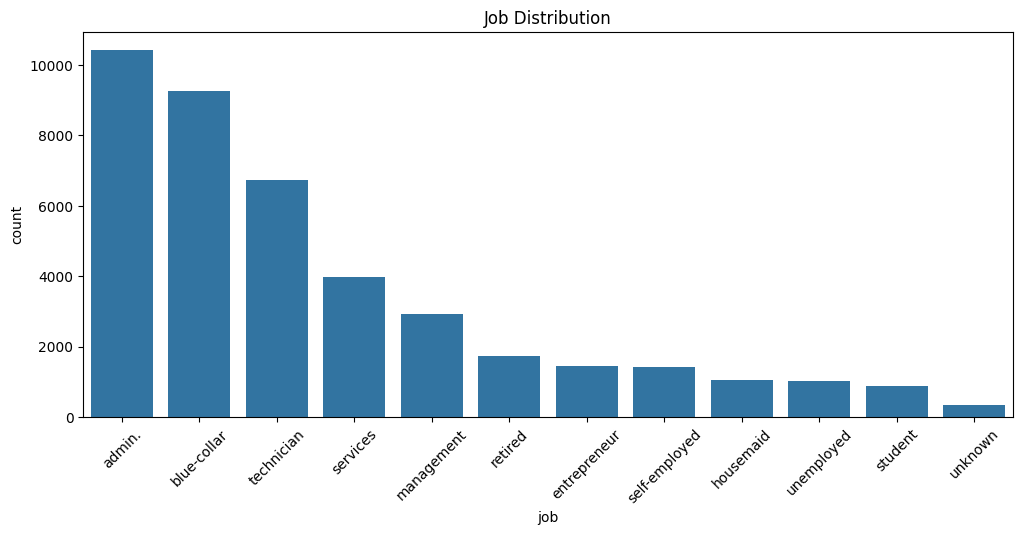

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.show()

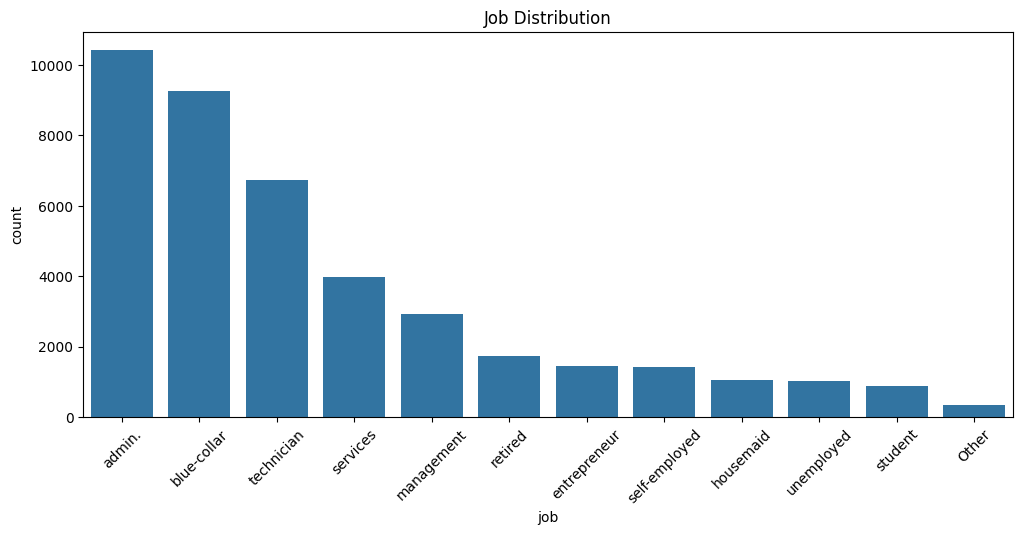

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
df = pd.read_csv('Cleaned_BankMarketing.csv', sep=',')

# Perform cleaning steps for the 'job' column
df['job'] = df['job'].replace('unknown', 'Other')
df['job'] = df['job'].fillna('Other')

# Generate the countplot for 'job'
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.show()

Marital Status Vs Subscription

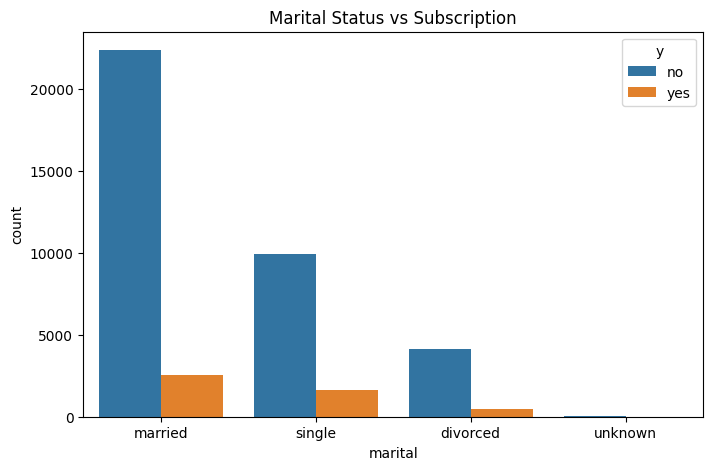

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Marital Status vs Subscription')
plt.show()


Education Vs Subscription

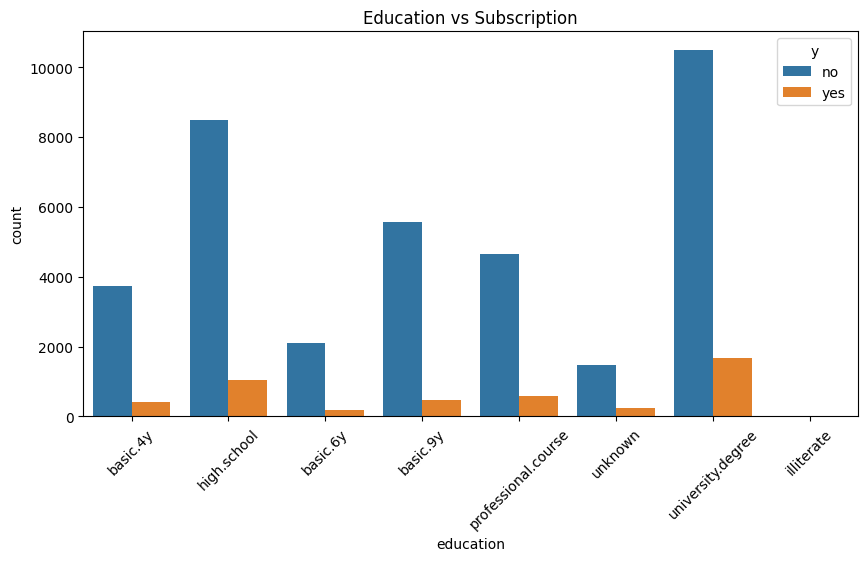

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='y')
plt.xticks(rotation=45)
plt.title('Education vs Subscription')
plt.show()

Streamlit Dashboard

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


2025-07-03 21:54:50.596 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 21:54:50.829 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 21:54:50.983 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-03 21:54:50.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 21:54:50.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 21:54:50.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 21:54:50.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

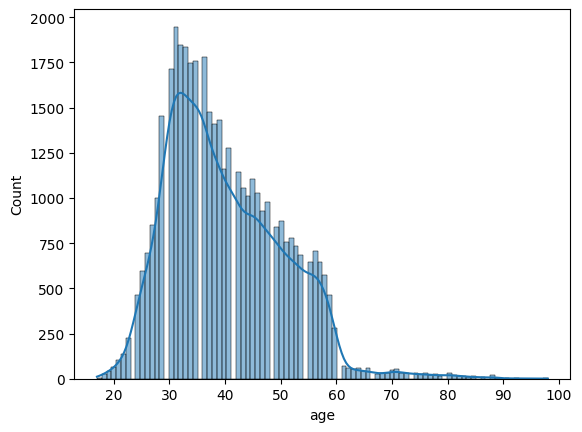

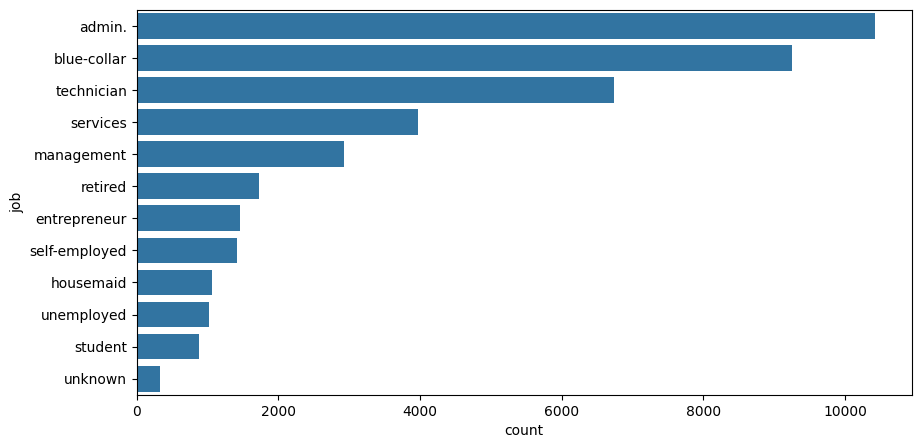

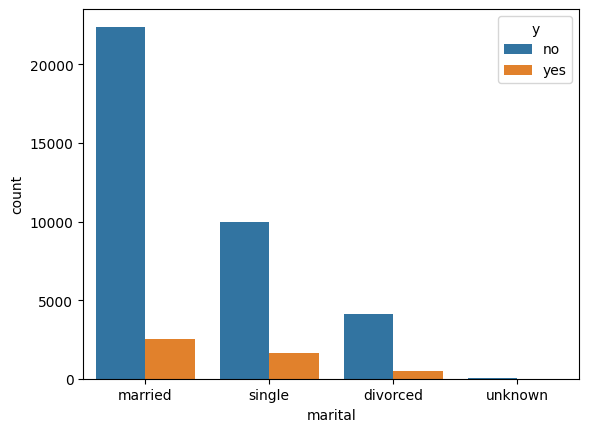

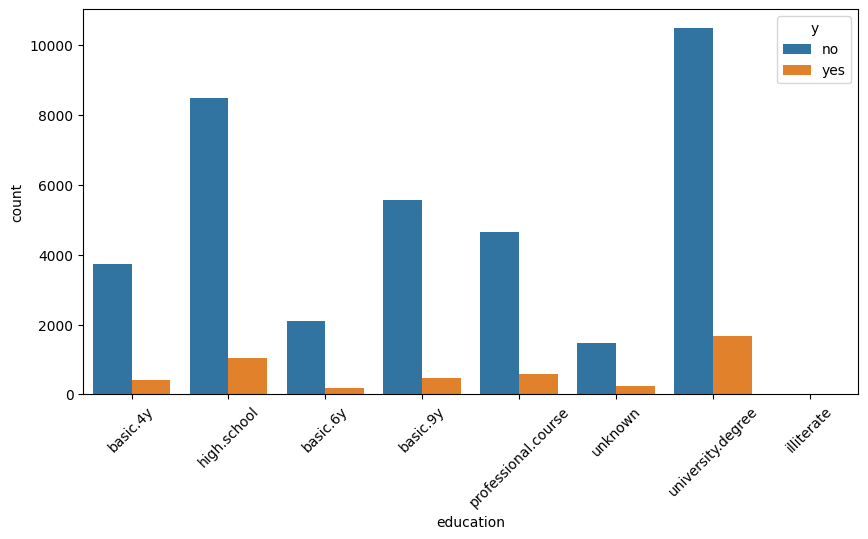

In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Bank Marketing Dashboard", layout="wide")

# Load data
df = pd.read_csv('Cleaned_BankMarketing.csv')

st.title("📊 Bank Marketing Campaign Dashboard")

# Show raw data
if st.checkbox("Show Raw Data"):
    st.write(df.head())

# Subscription distribution
st.subheader("1. Subscription Outcome")
st.bar_chart(df['y'].value_counts())

# Age Distribution
st.subheader("2. Age Distribution")
fig1, ax1 = plt.subplots()
sns.histplot(df['age'], kde=True, ax=ax1)
st.pyplot(fig1)

# Job Distribution
st.subheader("3. Job Category Distribution")
fig2, ax2 = plt.subplots(figsize=(10,5))
sns.countplot(data=df, y='job', order=df['job'].value_counts().index, ax=ax2)
st.pyplot(fig2)

# Marital vs Subscription
st.subheader("4. Marital Status vs Subscription")
fig3, ax3 = plt.subplots()
sns.countplot(data=df, x='marital', hue='y', ax=ax3)
st.pyplot(fig3)

# Education vs Subscription
st.subheader("5. Education vs Subscription")
fig4, ax4 = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='education', hue='y', ax=ax4)
plt.xticks(rotation=45)
st.pyplot(fig4)


In [ ]:
from google.colab import files
files.download("BankMarketing.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile BankMarketing.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Bank Marketing Dashboard", layout="wide")

# Load data
df = pd.read_csv('Cleaned_BankMarketing.csv')

st.title("📊 Bank Marketing Campaign Dashboard")

# Show raw data
if st.checkbox("Show Raw Data"):
    st.write(df.head())

# Subscription distribution
st.subheader("1. Subscription Outcome")
st.bar_chart(df['y'].value_counts())

# Age Distribution
st.subheader("2. Age Distribution")
fig1, ax1 = plt.subplots()
sns.histplot(df['age'], kde=True, ax=ax1)
st.pyplot(fig1)

# Job Distribution
st.subheader("3. Job Category Distribution")
fig2, ax2 = plt.subplots(figsize=(10,5))
sns.countplot(data=df, y='job', order=df['job'].value_counts().index, ax=ax2)
st.pyplot(fig2)

# Marital vs Subscription
st.subheader("4. Marital Status vs Subscription")
fig3, ax3 = plt.subplots()
sns.countplot(data=df, x='marital', hue='y', ax=ax3)
st.pyplot(fig3)

# Education vs Subscription
st.subheader("5. Education vs Subscription")
fig4, ax4 = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='education', hue='y', ax=ax4)
plt.xticks(rotation=45)
st.pyplot(fig4)

Writing BankMarketing.py
